# <b>Apprentissage supervisé</b>
## <b><i>Loi normale multidimensionnelle & fonctions discriminantes</i></b>

### **I. Introduction & objectifs**

Les objectifs de ce projet sont : 

- L'exploration et la simulation de la loi normale multidimensionnelle (ou encore la gaussienne multivariée) qui est une généralisation de la loi normale unidimensionnelle. La loi multinormale est paramétrée par un vecteur $\mu \in \mathbb{R}^n$ représentant son centre et une matrice $\Sigma$ qui est sa matrice de variance-covariance.
- L'étude du lien entre la loi multinormale et les classifieurs linéaires et quadratiques.

#####**Installation et chargement des dépendences**

Nous allons commencer par installer et charger les dépendences nécessaires pour le projet : 

In [ ]:
install.packages('mvtnorm')
install.packages('MixSim')
install.packages('SciViews')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ellipse’




In [ ]:
library(MASS)
library(SciViews)
library(RColorBrewer)
library(mvtnorm)
library(MixSim)

### **II. Distribution gaussienne multivariée**

Même si la loi multinormale est censée fonctionner avec n'importe quel nombre de dimensions, nous allons nous focaliser, pour ce projet, sur des données bidimentionnelles pour permettre une meilleure visualisation de la distribution.

##### **Fonction de la distibution**

La fonction suivante permet de générer une distribution gaussienne multivariée avec des paramètres `mu` (vecteur de centre) et `sigma` (matrice de variance-covariance).
  
La fonction `contour` nous permettera de visualiser cette ditribution en 2 dimensions : 

In [ ]:
multinormal <- function(mu = c(0, 0), sigma = matrix(c(1, 0, 0, 1), nrow= 2), title = 'Multivariate gaussian distribution')
{
  
  # generating points
  x.points <- seq(-3, 3, length.out=100)
  y.points <- x.points
  
  # densities initialization
  z <- matrix(0, nrow=100, ncol=100)

  # densities matrix computation using dmvnorm
  for (i in 1:100)
  {
    for (j in 1:100) 
    {
      z[i, j] <- dmvnorm(c(x.points[i], y.points[j]), mean=mu, sigma=sigma)
    }
  }

  # plot distribution
  contour(x.points, y.points, z, xlab = 'x', ylab = 'y', main = title, cex.main=1.5)
}

#####**1er cas : x et y sont des variables indépendantes**

Dans ce cas, nous allons représenter les distributions multinormales avec : 
- $var(x) = var(y)$
- $var(x) \neq var(y)$

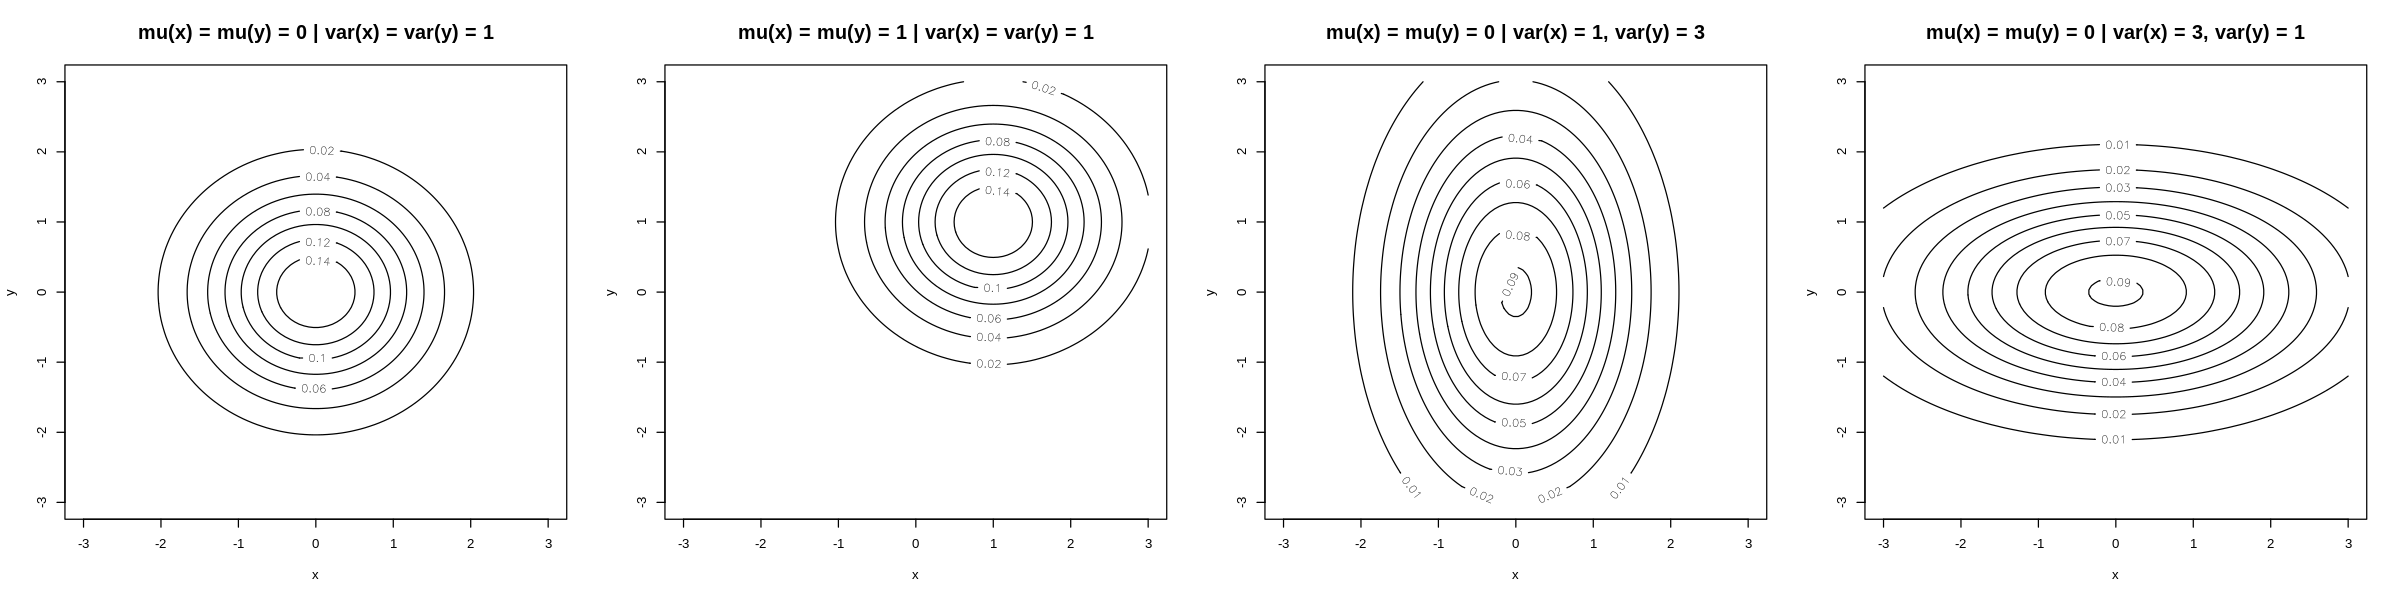

In [ ]:
options(repr.plot.width=20, repr.plot.height=5)

par(mfrow = c(1, 4))

# same variance for x & y
multinormal(sigma = matrix(c(1, 0, 0, 1), nrow = 2), title = "mu(x) = mu(y) = 0 | var(x) = var(y) = 1")
multinormal(mu = c(1, 1), sigma = matrix(c(1, 0, 0, 1), nrow = 2), title = "mu(x) = mu(y) = 1 | var(x) = var(y) = 1")

# different variance for x & y 
multinormal(sigma = matrix(c(1, 0, 0, 3), nrow = 2), title = "mu(x) = mu(y) = 0 | var(x) = 1, var(y) = 3")
multinormal(sigma = matrix(c(3, 0, 0, 1), nrow = 2), title = "mu(x) = mu(y) = 0 | var(x) = 3, var(y) = 1")

On remarque que les contours de loi normale multidimensionnelle sont des ellipsoïdes centrés sur la moyenne $\mu$. Les directions des axes principaux de ces ellipsoïdes sont les vecteurs propres de la matrice de variance co-variance $\Sigma$.

Dans le cas particulier où la variance est égale pour les deux variables, on remarque que la distribution est plus sphérique qu'ellipsoïdale. La forme ellipsoïdale se dessine lorsque les variances ne sont pas égales : les contours s'allongent dans la direction de la variable qui possède la plus grande variance.

##### **2e cas : x et y sont des variables corrélées**

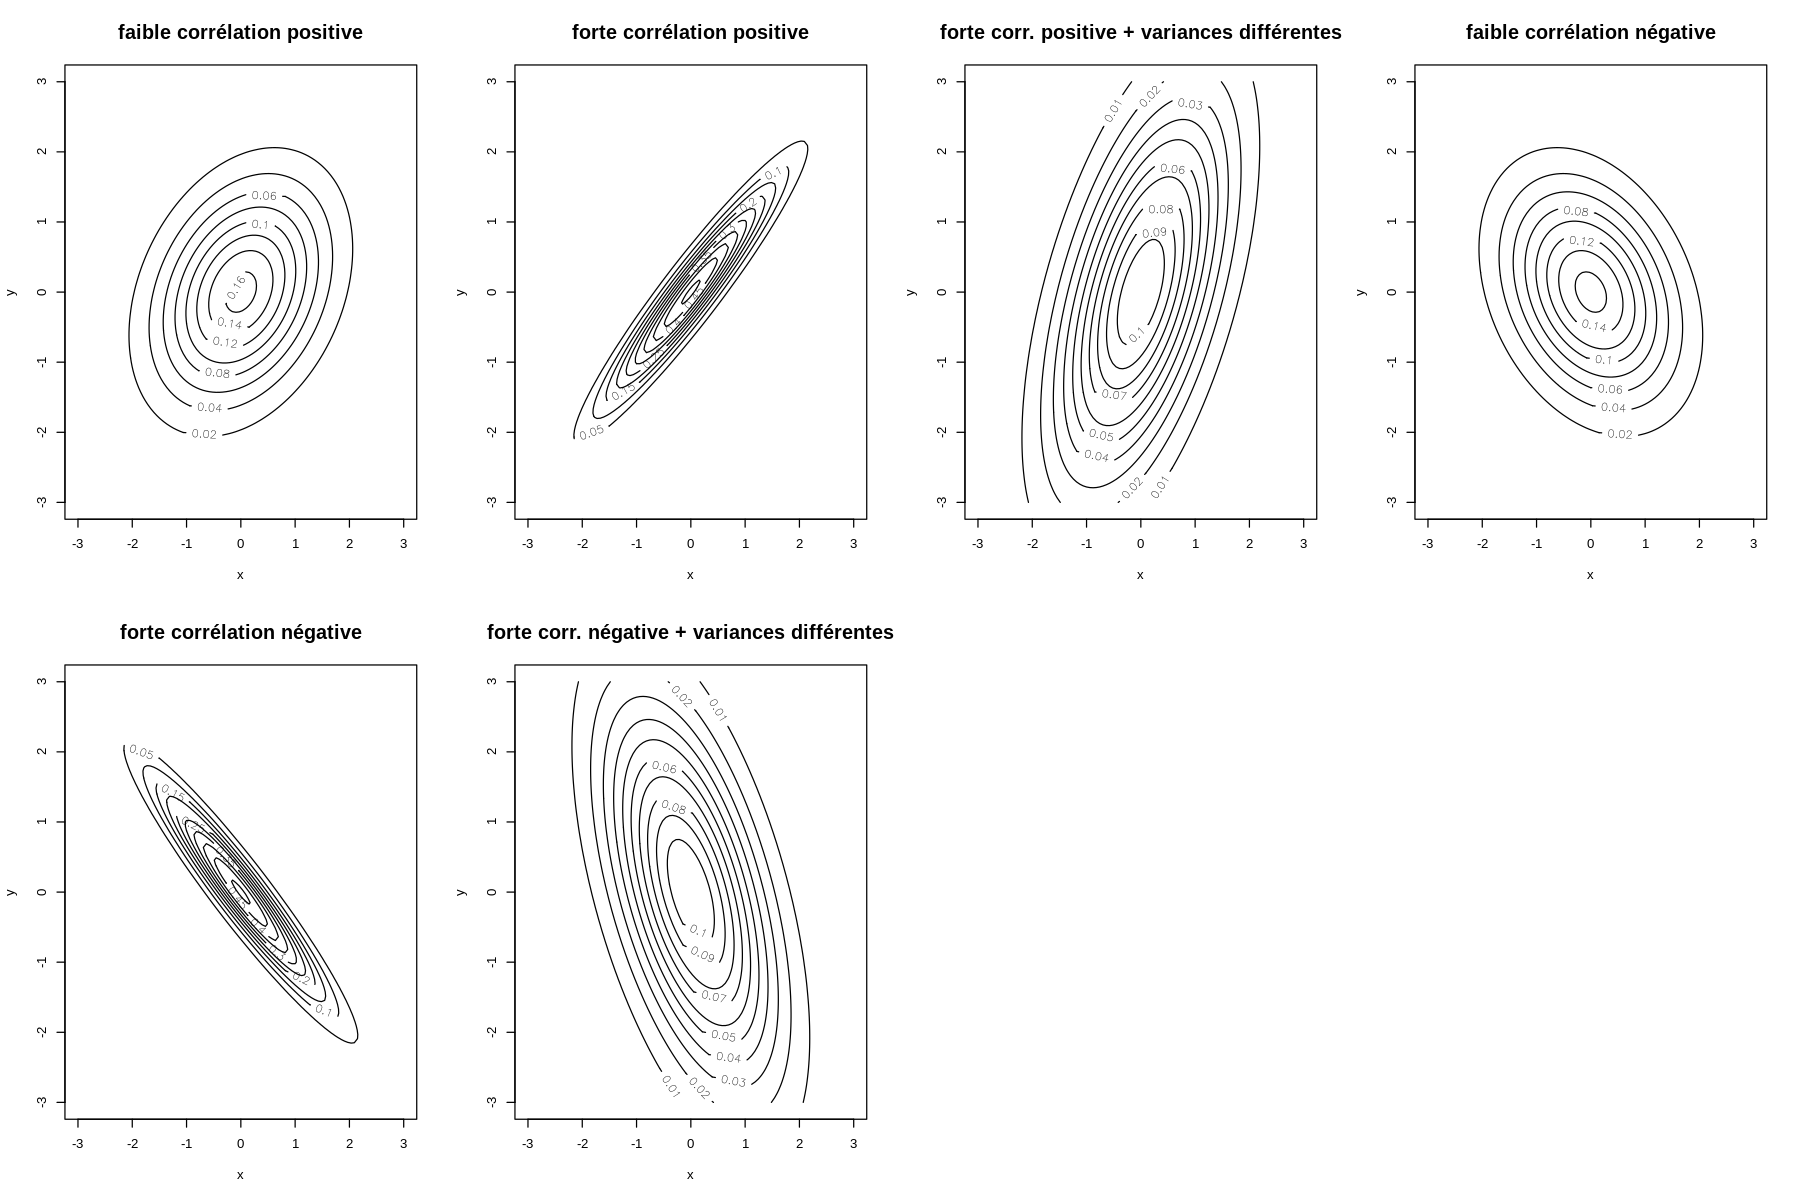

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

par(mfrow = c(2, 4))

multinormal(sigma = matrix(c(1, 0.3, 0.3, 1), nrow = 2), title = "faible corrélation positive")
multinormal(sigma = matrix(c(1, 0.95, 0.95, 1), nrow = 2), title = "forte corrélation positive")
multinormal(sigma = matrix(c(1, 0.95, 0.95, 3), nrow = 2), title = "forte corr. positive + variances différentes")

multinormal(sigma = matrix(c(1, -0.3, -0.3, 1), nrow = 2), title = "faible corrélation négative")
multinormal(sigma = matrix(c(1, -0.95, -0.95, 1), nrow = 2), title = "forte corrélation négative")
multinormal(sigma = matrix(c(1, -0.95, -0.95, 3), nrow = 2), title = "forte corr. négative + variances différentes")

On remarque que la corrélation représente une rotation de la densité de distribution. Plus la corrélation est forte, plus le degré de rotation est important. Le sens de la rotation dépend de si la corrélation est négative ou positive. La rotation est tout de même "amortie" lorsque les variances des variables sont différentes.

### **III. Génération des jeux de données**

L'objectif est de générer des jeux de données suivant une distribution multinormale en utilisant la librairie `MixSim`. Les paramètres intéressants à modifier sont : 

- Le degré de mélange des données.
- La proportion des classes.
- La structure de $\Sigma$.

On propose la génération des jeux de données suivants : 

- Jeu 1 (sphérique) : 500 observations avec 2 dimensions et 2 classes bien séparées.
- Jeu 2 (sphérique) : 500 observations avec 2 dimensions et 3 classes avec un degré de mélange différent de 0.
- Jeu 3 (non sphérique) : 500 observations avec 2 dimensions et 3 classes avec un degré de mélange différent de 0.

In [ ]:
jeu1.Q <- MixSim(MaxOmega = 0.0, BarOmega = 0.0, K = 2, p = 2, sph = TRUE)
jeu1 <- simdataset(n = 500, Pi = jeu1.Q$Pi, Mu = jeu1.Q$Mu, S = jeu1.Q$S)

jeu2.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = TRUE)
jeu2 <- simdataset(n = 500, Pi = jeu2.Q$Pi, Mu = jeu2.Q$Mu, S = jeu2.Q$S)

jeu3.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = FALSE)
jeu3 <- simdataset(n = 500, Pi = jeu3.Q$Pi, Mu = jeu3.Q$Mu, S = jeu3.Q$S)

On définit par la suite une fonction qui trace le nuage de points d'un jeu de données :

In [ ]:
plot_data <- function(jeu, predicts, title)
{
  plot(
    jeu$X, 
    col = colors[predicts], 
    pch = 19, 
    cex = 0.8,
    xlab = "", 
    ylab = "", 
    axes = F, 
    main = title, 
    cex.main=1.5
    )
    
  box()
}

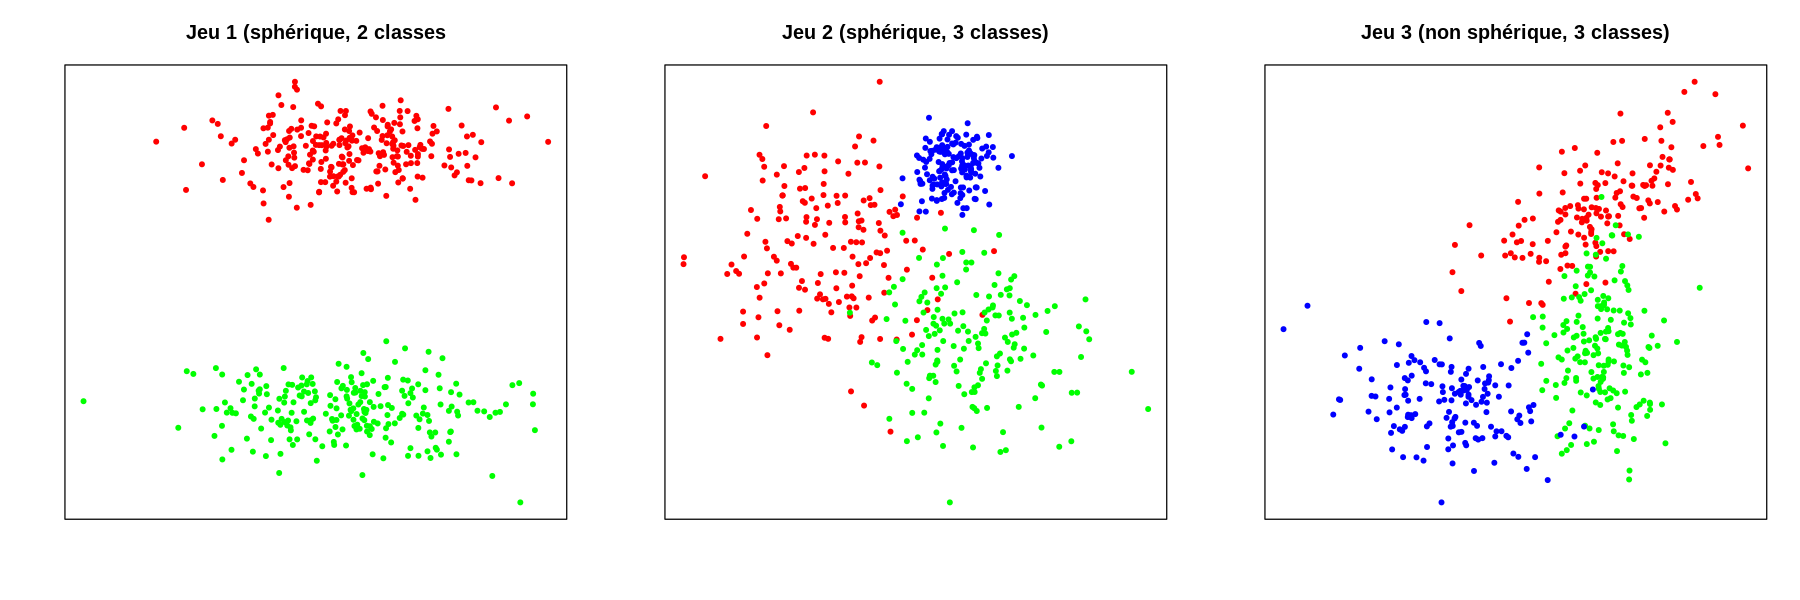

In [ ]:
colors <- c("red", "green", "blue")
options(repr.plot.width=15, repr.plot.height=5)

par(mfrow=c(1,3))

plot_data(jeu1, jeu1$id, "Jeu 1 (sphérique, 2 classes")
plot_data(jeu2, jeu2$id, "Jeu 2 (sphérique, 3 classes)")
plot_data(jeu3, jeu3$id, "Jeu 3 (non sphérique, 3 classes)")

On remarque que les jeux de données 1 et 2 forment des groupes et ont une forme sphérique, contrairement au jeu 3 qui laisse apparaître des groupes mais qui n'est pas sphérique. Bien sûr, les sphères ne sont pas *parfaites* mais on peut facilement faire la distinction entre des données sphériques et non sphériques.

### **IV. Fonction discriminante $g_i$**

L'objectif de cette partie est de simuler la fonction discriminante, d'appliquer cette fonction aux 3 jeux de données générés précédemment, pour ensuite tracer les frontières de décisions et interpréter les résultats.

On rappelle que la fonction discriminante $g_i$ est définie par : 

$$g_i(x) = -\frac{1}{2}(x - \mu_i)^T \Sigma_{i}^{-1}(x - \mu) - \frac{1}{2}ln|\Sigma_i| + lnP(c_i)$$

On définit donc la distance de Mahalanobis ainsi que la fonction discriminante comme suit : 

In [ ]:
# Function to compute Mahalanobis distance
mahalanobis_dist <- function(x, y, sigma)
{
  return(t(matrix(x)) %*% solve(sigma) %*% matrix(y))
}

# Function to compute gi(x)
gi <- function(x, mu, sigma, prior_prob)
{
  return((-(1/2) * mahalanobis_dist(x-mu, x-mu, sigma)) - ((1/2)*ln(det(sigma))) + ln(prior_prob))  
}

On définit ensuite une fonction permettant de classifier un jeu de données distribué suivant une gaussienne multivariée, en utilisant la fonction discriminante précédente : 

In [ ]:
class_x <- function(x, mus, sigmas, real)
{ 
    gis = c()
    sigma_j = 0
    
    for (i in 1:dim(mus)[1])
    {
      sigma = matrix(sigmas[(1+sigma_j):(4+sigma_j)], nrow=2)
      prior_prob = sum(real == i) / length(real)
      gis = c(gis, gi(x, mus[i, ], sigma, prior_prob))
      sigma_j = sigma_j + 4
    }

    return(which.max(gis))
}

predict <- function(jeu, mus, sigmas, real)
{
  return(apply(jeu, 1, (function(x) class_x(x, mus, sigmas, real))))
}

Il ne nous reste plus qu'à utiliser notre fonction de prédiction sur les 3 jeux de données : 

In [ ]:
pred1 = predict(jeu1$X, jeu1.Q$Mu, jeu1.Q$S, jeu1$id)
pred2 = predict(jeu2$X, jeu2.Q$Mu, jeu2.Q$S, jeu2$id)
pred3 = predict(jeu3$X, jeu3.Q$Mu, jeu3.Q$S, jeu3$id)

In [ ]:
print(paste("Accuracy jeu 1 :", mean(pred1==jeu1$id)))
print(paste("Accuracy jeu 2 :", mean(pred2==jeu2$id)))
print(paste("Accuracy jeu 3 :", mean(pred3==jeu3$id)))

[1] "Accuracy jeu 1 : 1"
[1] "Accuracy jeu 2 : 0.954"
[1] "Accuracy jeu 3 : 0.952"


On définit ensuite une fonction permettant de tracer les frontières de décisions :

In [ ]:
plot_frontieres <- function(jeu, jeuQ, title, dim)
{
  GS = 50
  XLIM = range(jeu$X[, 1])
  YLIM = range(jeu$X[, 2])
  tmpx = seq(XLIM[1], XLIM[2], len=GS)
  tmpy = seq(YLIM[1], YLIM[2], len=GS)
  grid = expand.grid(tmpx, tmpy)

  pred_grid = predict(grid, jeuQ$Mu, jeuQ$S, jeu$id)
  cols_grid = my_cols[as.numeric(pred_grid)]
  cols_X = my_cols[as.numeric(jeu$id)]
  plot(jeu$X, xlab="x", ylab="y", type="n", xlim=XLIM, ylim=YLIM)
  points(grid, col=cols_grid, pch=".")
  
  contour(tmpx, tmpy, matrix(pred_grid, GS, GS), levels=1:dim, add=TRUE, drawlabels=FALSE)
  points(jeu$X, col=cols_X)
  title(title, cex=1.5)
}

On utilise la fonction `plot_frontieres` pour visualiser les frontières de décision : 

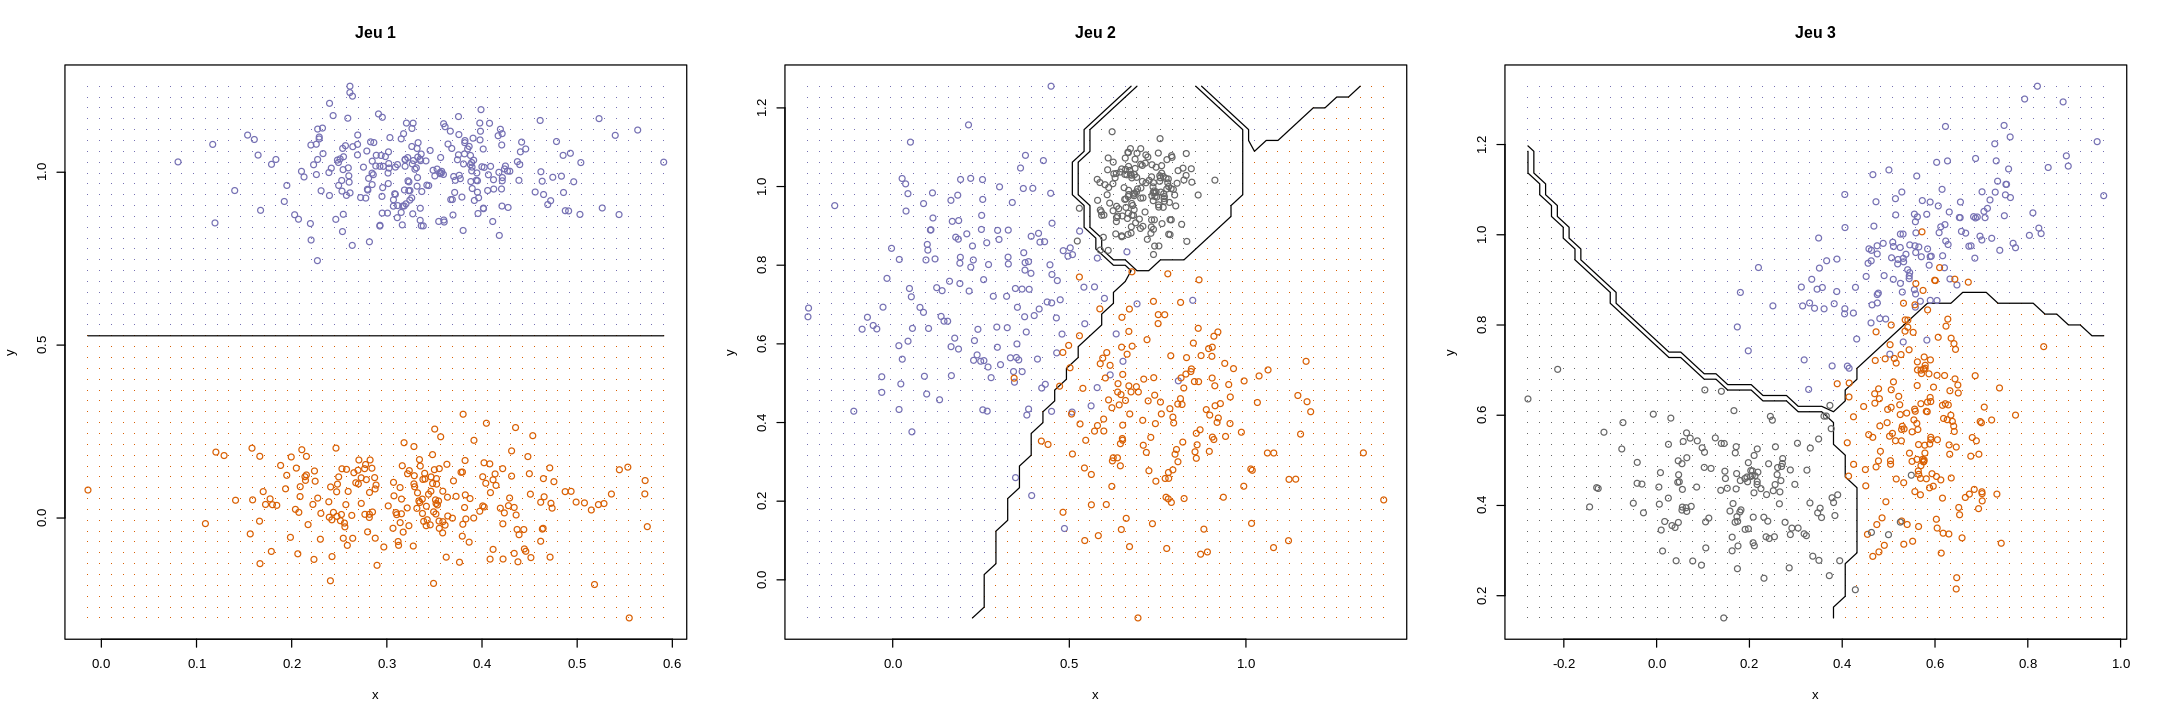

In [ ]:
my_cols = brewer.pal(8, "Dark2")[c(3, 2, 8)]
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow = c(1, 3))


plot_frontieres(jeu1, jeu1.Q, "Jeu 1", 2)
plot_frontieres(jeu2, jeu2.Q, "Jeu 2", 3)
plot_frontieres(jeu3, jeu3.Q, "Jeu 3", 3)

On remarque que la classification du premier jeu de données est parfaite, cela rejoint le fait que l'accuracy est égale à $100\%$. Cela est notamment dû au fait que les données soient sphériques (l'intra-inertie est plus faible que dans le cas elliptique) et bien séparés. La frontière de décision a l'air d'être linéaire, la fonction discriminante est donc linéaire.
  
La séparation est plutôt "correcte" concernant le deuxième jeu de données, même si certains points ne sont pas bien classés. Cela est dû au fait que les classes ne soient pas bien séparés et que la fonction discriminante soit linéaire (inadaptée à ce cas particulier) à cause du fait que la matrice de variance-covariance soit la même pour toutes les classes. 

Concernant le troisième jeu de données, la séparation est légèrement meilleure comparé au deuxième jeu de données. En effet, le 3e jeu de données représente le cas le plus général : les variables ne sont pas indépendantes et les matrices de variance-covariance sont différentes pour toutes les classes. La fonction discriminante est donc quadratique dans ce cas.